In this code, our objective is to train some classic models such as SVM, KNN, RandomForest, etc on our test data, and try to evaluate their efficiency by plotting confusion matrixes, learning curves, validation curves, and measuring the prediction time. 

Import required libreries

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Import phase I data

In [ ]:
# phase I data which is entirely cleared and preprocessed should be imported here.
# we will have X,Y variables which are representations for sample data with their features 
# and the target function which is Y

In [58]:
# X,Y = # is a table consisting samples with their features: X concat Y (with the name Y)
# tst_size = 0.2
# ns, nf = np.shape(X) 
# X_train, X_test, Y_train, Y_test = train_test_split(*shuffle(X, Y, n_samples = ns, random_state=0) , random_state=0, test_size =tst_size )

SyntaxError: invalid syntax (Temp/ipykernel_10764/4245754019.py, line 1)

In [81]:
# this is fake data, only for debugging purpose

huge_data =  pd.read_csv('sample_data.csv')
# print(huge_data.head())
narrower_data= huge_data.drop(['Unnamed: 0','phkey','In_halo_log'], axis=1)
narrower_data.head()
data = np.array(narrower_data)

X = data[:,2:8]
X = np.concatenate((X,X))
# print(x.shape)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit(X).transform(X)
# print(X)
Y = data[:,9]
Y = np.concatenate((Y,Y))
Y[Y>1]=1
# print(Y)

tst_size = 0.2
ns, nf = np.shape(X) 
# split data to train and test 
X_train, X_test, Y_train, Y_test = train_test_split(*shuffle(X, Y, n_samples = ns, random_state=0) , random_state=0, test_size =tst_size )
# cross validation

# SVM Model

Initialize and train svm model

In [83]:
# from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

svc = svm.SVC()
tst_size = 0.2
ns, nf = np.shape(X) 
# split data to train and test 
X_train, X_test, Y_train, Y_test = train_test_split(*shuffle(X, Y, n_samples = ns, random_state=0) , random_state=0, test_size =tst_size )
# cross validation
# scores = cross_val_score(svc, X_train, Y_train, cv=5 ,scoring= 'f1')
cv = 5
scoring = 'f1'
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
                'kernel': ['rbf', 'linear', 'sigmoid']}
# evaluate hyper-parameters 
clf = GridSearchCV(svc, param_grid, scoring = scoring, cv = cv ,verbose = 1, n_jobs=-1, return_train_score=1)
# train model
trained_model = clf.fit(X_train, Y_train)
# predict data
Y_pred = trained_model.predict(X_test)
# scores = cross_val_score(clf.best_estimator_, X_train, Y_train, cv=5 ,scoring= 'accuracy')
# print(scores)
print(clf.best_score_)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
0.906043956043956


### Classification Report
Print some information about the trained model such as training time, ... 

In [85]:
print("Best parameters set found on development set:")
print(trained_model.best_params_)
print()
print(sorted(trained_model.cv_results_.keys()))
print(trained_model.best_score_)
# print(trained_model.cv_results_.mean_fit)

print('-----------------')
# print(Y_pred)
print('\nclassification report: \n')
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

EM1 = 
CVS = 
CPS = 
T = 
PT = 


Best parameters set found on development set:
{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

['mean_fit_time', 'mean_score_time', 'mean_test_score', 'mean_train_score', 'param_C', 'param_gamma', 'param_kernel', 'params', 'rank_test_score', 'split0_test_score', 'split0_train_score', 'split1_test_score', 'split1_train_score', 'split2_test_score', 'split2_train_score', 'split3_test_score', 'split3_train_score', 'split4_test_score', 'split4_train_score', 'std_fit_time', 'std_score_time', 'std_test_score', 'std_train_score']
0.906043956043956
-----------------

classification report: 

              precision    recall  f1-score   support

         0.0       1.00      0.67      0.80         3
         1.0       0.90      1.00      0.95         9

    accuracy                           0.92        12
   macro avg       0.95      0.83      0.87        12
weighted avg       0.92      0.92      0.91        12



### Confusion Matrix

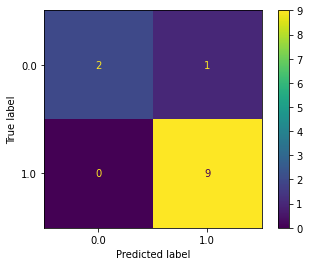

In [95]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, Y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

### Learning Curve


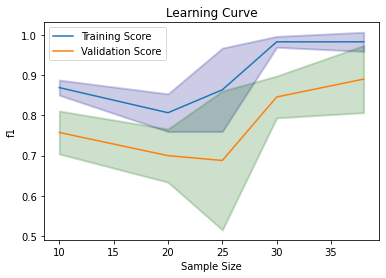

Training scores:

          cv1       cv2       cv3       cv4       cv5
10  0.888889  0.833333  0.875000  0.875000  0.875000
20  0.750000  0.750000  0.857143  0.838710  0.838710
25  0.827586  0.692308  0.857143  0.971429  0.971429
30  1.000000  0.971429  1.000000  0.972973  0.972973
38  1.000000  0.938776  1.000000  1.000000  0.978723

 ----------------------------------------------------------------------

Validation scores:

          cv1       cv2       cv3       cv4       cv5
10  0.750000  0.769231  0.666667  0.833333  0.769231
20  0.750000  0.750000  0.571429  0.714286  0.714286
25  0.461538  0.545455  0.666667  0.857143  0.909091
30  0.857143  0.857143  0.750000  0.857143  0.909091
38  0.857143  0.923077  0.750000  0.923077  1.000000


In [96]:
ns = [10,20,25,30,38]
train_sizes, train_scores, valid_scores = learning_curve(trained_model, X_train, Y_train, train_sizes=ns, cv=cv, scoring= scoring, n_jobs = -1)

train_scores_mean =  train_scores.mean(axis = 1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean =  valid_scores.mean(axis = 1)
validation_scores_std  = valid_scores.std(axis = 1)

xlabel = 'Sample Size'
ylabel = scoring
plt_title = 'Learning Curve'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
ax.plot(train_sizes, train_scores_mean, label = 'Training Score')
ax.plot(train_sizes, validation_scores_mean, label = 'Validation Score')

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkblue", lw=2)
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.2,
                 color="darkgreen", lw=2)

plt.legend()
# plt.yscale('log')
plt.show()

print('Training scores:\n\n', pd.DataFrame( train_scores, columns=[f'cv{i+1}' for i in range(cv)], index=ns) )
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', pd.DataFrame(valid_scores, columns=[f'cv{i+1}' for i in range(cv)], index=ns) )

### Validation Curve


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.0s finished


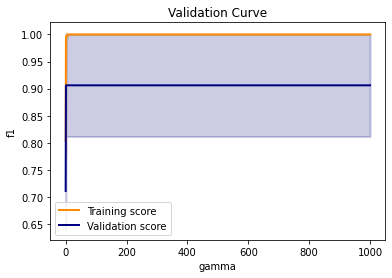

Training scores:

          cv1       cv2       cv3       cv4       cv5
10  0.807018  0.779661  0.821429  0.846154  0.761905
20  1.000000  1.000000  1.000000  1.000000  0.979592
25  1.000000  1.000000  1.000000  1.000000  1.000000
30  1.000000  1.000000  1.000000  1.000000  1.000000
38  1.000000  1.000000  1.000000  1.000000  1.000000

 ----------------------------------------------------------------------

Validation scores:

          cv1   cv2       cv3       cv4       cv5
10  0.750000  0.75  0.571429  0.769231  0.714286
20  0.857143  1.00  0.750000  0.923077  1.000000
25  0.857143  1.00  0.750000  0.923077  1.000000
30  0.857143  1.00  0.750000  0.923077  1.000000
38  0.857143  1.00  0.750000  0.923077  1.000000


In [97]:
from sklearn.linear_model import Ridge
c_list = param_grid.get('C')
train_scores, valid_scores = validation_curve(SVC(), X_train, Y_train, 
                                              param_name="gamma",
                                              param_range=c_list , 
                                              cv=cv, 
                                              scoring = scoring,
                                              verbose=1, 
                                              n_jobs=-1
                                             )
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

xlabel = 'gamma'
ylabel = scoring
plt_title = 'Validation Curve'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
plt.plot(c_list, train_scores_mean, label="Training score",
             color="darkorange", lw=2)
plt.fill_between(c_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=2)
plt.plot(c_list, valid_scores_mean, label="Validation score",
             color="navy", lw=2)
plt.fill_between(c_list, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=2)
plt.legend(loc="best")
plt.show()

print('Training scores:\n\n', pd.DataFrame( train_scores, columns=[f'cv{i+1}' for i in range(cv)], index=ns) )
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', pd.DataFrame(valid_scores, columns=[f'cv{i+1}' for i in range(cv)], index=ns) )

### Regularization (if needed) 
do we need it??

In [ ]:
from sklearn.linear_model import Ridge

# deg_list 
deg = 15
ns = 20
X_train, X_test, Y_train, Y_test = train_test_split(*shuffle(X_bbr, Y_bbr, n_samples = ns, random_state=0) , random_state=0, test_size =.5 )


w_list = []

x_range = np.arange(X_bbr.min(), X_bbr.max(), .1)


fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title)
# ax.scatter(X_train, Y_train, label = 'Train data')
ax.scatter(X_test, Y_test, c='black', label = 'Test data')


r_list = [0,.1,1,10]

for r in r_list:

  rg = Pipeline([('poly', PolynomialFeatures(degree=deg) ), 
                ('model', Ridge( alpha=r ) ### We are using Ridge which uses l2 regularization. 
                )])
  rg.fit( X_train.reshape(-1,1), Y_train )

  ### Let's store the weights
  w_list += [rg[1].coef_]

  y_range = rg.predict(x_range.reshape(-1,1) )
  ax.plot(x_range, y_range,  alpha = .6, label=f'Regularization={r}')


w_list = np.array(w_list)
plt.ylim(-1.5,2)
ax.legend()
plt.show()

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# scale model

lrg = LogisticRegression()
tst_size = 0.2
ns, nf = np.shape(X)
# split data to train and test 
# X_train, X_test, Y_train, Y_test = train_test_split(*shuffle(X, Y, n_samples = ns, random_state=0) , random_state=0, test_size =tst_size )
# cross validation
# scores = cross_val_score(svc, X_train, Y_train, cv=5 ,scoring= 'recall')
# print(scores)
param_grid=  { 'solver':{'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'},'penalty':{'l1', 'l2', 'elasticnet', 'none'},'fit_intercept'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf','linear','sigmoid']}
# evaluate hyper-parameters 
clf = GridSearchCV(svc, param_grid, scoring = 'f1', cv = 5 ,verbose = 1, n_jobs=-1, return_train_score=1)
# train model
trained_model = clf.fit(X_train, Y_train)
# predict data
Y_pred = trained_model.predict(X_test)
# scores = cross_val_score(clf.best_estimator_, X_train, Y_train, cv=5 ,scoring= 'accuracy')
# print(scores)
print(clf.best_score_)

# Comparing Models

A table is created to compare the five recently-traind models above. It includes evaluation metric(s), training time and prediction time of each models. Also, we sorted models based on their performance from different aspects. 

In [ ]:
table = pd.DataFrame({'Name':['SVM', 'Logestic Regression', 'Random Forest', 'KNN', 'undecided'],
                        'Evaluation Metric(s)': [EM1, EM2, EM3, EM4, EM5],
                        'Corresponding Validation Score': [CVS1, CVS2, CVS3, CVS4, CVS5],
                        'Corresponding Prediction Score':  [CPS1, CPS2, CPS3, CPS4, CPS5],
                        'Training Time': [T1, T2, T3, T4, T5],
                        'Prediction Time': [PT1, PT2, PT3, PT4, PT5],
})

print('Sort models based on their validation scores: \n' + str(table.sort_values(by=['Corresponding Validation Score', ascending= False]).loc[:, ['Name', 'Corresponding Validation Score']))
print('\nSort models based on their prediction scores: \n' + str(table.sort_values(by=['Corresponding Prediction Score', ascending= False]).loc[:, ['Name', 'Corresponding Prediction Score']))
print('\nSort models based on their validation scores: \n' + str(table.sort_values(by=['Training Time', ascending= True]).loc[:, ['Name', 'Training Time']))
print('\nSort models based on their validation scores: \n' + str(table.sort_values(by=['Prediction Time', ascending= True]).loc[:, ['Name', 'Prediction Time']))
